In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

from pylab import rcParams

In [2]:
dataset = pd.read_excel(r'C:\Users\Admin\Documents\Dry_Maize.xlsx')
dataset.tail()

,Dates,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,...,Thika,Kajiado,Imenti,Garissa,Wajir,Marimanti,Meru,Bungoma,Makueni,Transmara
55,2018-08-01,Bag,90,2533.000,2140.0,2600.0,1960.0,1754.0,3150.0,1653.000000,...,0,2700.0,0.0,0,2000.0,0,1766.666667,0,0,0
56,2018-09-01,Bag,90,2160.000,2100.0,2500.0,1810.0,1620.0,3150.0,1545.833333,...,0,2500.0,0.0,0,2500.0,0,1800.000000,0,0,0
57,2018-10-01,Bag,90,2000.000,1820.0,2600.0,1120.0,1600.0,2925.0,1512.500000,...,0,2000.0,0.0,0,2237.5,0,1260.000000,0,0,0
58,2018-11-01,Bag,90,1922.500,2150.0,2750.0,1500.0,1600.0,2550.0,1668.750000,...,0,2200.0,0.0,0,2500.0,0,2066.666667,0,0,0
59,2018-12-01,Bag,90,2111.875,2280.0,2600.0,1500.0,1410.0,2500.0,1783.333333,...,0,2600.0,0.0,3200,2500.0,0,2126.666667,0,0,0


In [3]:
dataset.shape

(60, 33)

In [4]:
df_Nairobi = pd.DataFrame()
df_Nairobi['Date'] = pd.to_datetime(dataset['Dates'])
df_Nairobi['Nairobi'] = dataset['Nairobi']
df_Nairobi = df_Nairobi.set_index('Date')

df_Nairobi.tail()

,Nairobi
Date,
2018-08-01,2533.000
2018-09-01,2160.000
2018-10-01,2000.000
2018-11-01,1922.500
2018-12-01,2111.875


In [5]:
df_Nairobi.describe()

,Nairobi
count,60.000000
mean,2955.834028
std,568.304838
min,1922.500000
25%,2648.250000
50%,2882.000000
75%,3151.500000
max,4704.000000


In [6]:
df_Nairobi.isnull().any()

Nairobi    False
dtype: bool

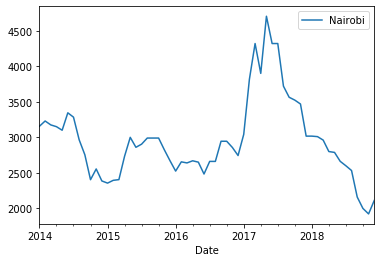

In [7]:
df_Nairobi.plot()
plt.show()

In [8]:
def check_for_stationarity(data):
    #Determine rolling mean and standard deviation
    rolmean = data.rolling(12).mean()
    rolstd = data.rolling(12).std()
    #Plot rolling statistics
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolmean, color='red',label='Rolling mean')
    plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & standard deviation')
    plt.show()
    #Perform ADF statistics
    result = adfuller(data, autolag='AIC')
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    print('Critical values')
    for key, value in result[4].items():
        print('\t{}:{}'.format(key,value))

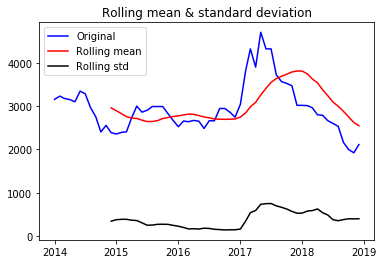

ADF Statistics:-1.37878238543986
p-value:0.5924047873450816
Critical values
	1%:-3.5463945337644063
	5%:-2.911939409384601
	10%:-2.5936515282964665


In [9]:
check_for_stationarity(df_Nairobi)

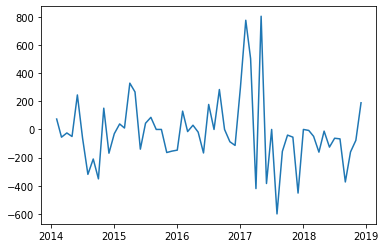

In [10]:
diff = df_Nairobi.diff()
diff.dropna(inplace=True)

plt.plot(diff)
plt.show()

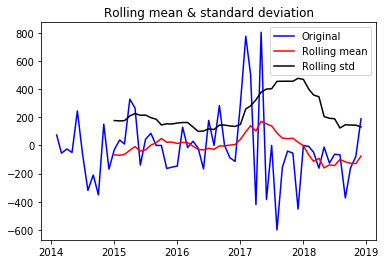

ADF Statistics:-7.329661613048734
p-value:1.1366094123557644e-10
Critical values
	1%:-3.548493559596539
	5%:-2.912836594776334
	10%:-2.594129155766944


In [11]:
check_for_stationarity(diff)

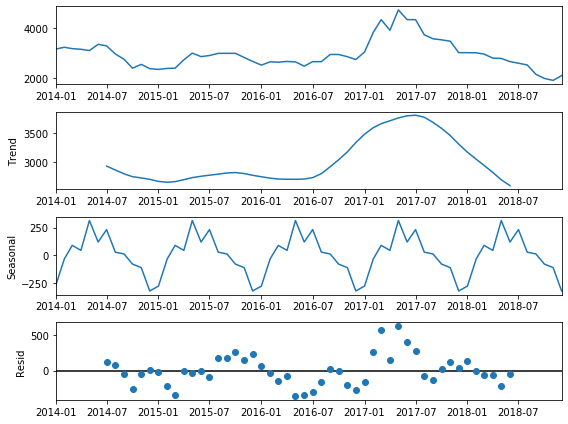

In [12]:
rcParams['figure.figsize'] = (8,6)
decomp_results = seasonal_decompose(df_Nairobi, period=12, model='additive')
type(decomp_results)
figure = decomp_results.plot()
plt.show()

In [13]:
residuals = decomp_results.resid
data_decompose = residuals
data_decompose.dropna(inplace=True)

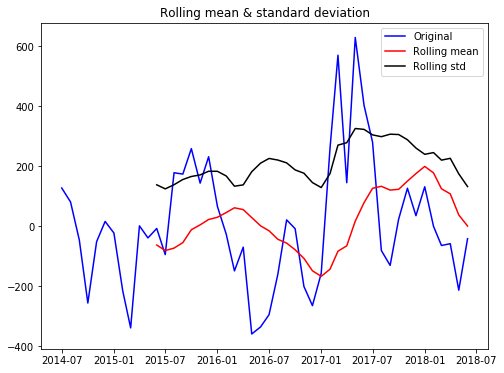

ADF Statistics:-3.2993831453065385
p-value:0.014906070440977429
Critical values
	1%:-3.5778480370438146
	5%:-2.925338105429433
	10%:-2.6007735310095064


In [14]:
check_for_stationarity(residuals)

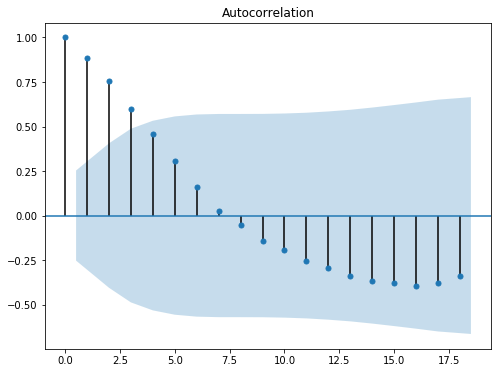

In [15]:
plot_acf(df_Nairobi)
plt.show()

In [16]:
arima_fit = pm.auto_arima(df_Nairobi, start_p=1, start_q=1,
                             max_p=2, max_q=2, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=676.679, BIC=685.930, Time=3.108 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=691.541, BIC=695.241, Time=0.053 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=681.599, BIC=689.000, Time=1.047 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=675.352, BIC=682.752, Time=1.411 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=689.543, BIC=691.393, Time=0.046 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=694.346, BIC=701.746, Time=0.743 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=679.063, BIC=690.164, Time=2.956 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close 

In [17]:
print(arima_fit.aic())
print(arima_fit.bic())

673.3533440772886
678.9037868824188


In [18]:
train = df_Nairobi['2014-01-01':'2017-12-01']
test = df_Nairobi['2018-01-01':]
arima_fit.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [19]:
future_forecast = arima_fit.predict(n_periods=12)
print(future_forecast)

[3213.42630611 3772.32966867 4118.47927381 3932.99367479 4489.91718812
 4248.47450925 4330.76265219 3990.03095607 3989.52533011 3987.29568249
 3962.87484305 3671.65751453]


In [20]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Nairobi_Prediction'])
act_vs_predict=pd.concat([test,future_forecast],axis=1)
act_vs_predict.head()

,Nairobi,Nairobi_Prediction
Date,,
2018-01-01,3017.083333,3213.426306
2018-02-01,3010.000000,3772.329669
2018-03-01,2961.250000,4118.479274
2018-04-01,2800.000000,3932.993675
2018-05-01,2788.000000,4489.917188


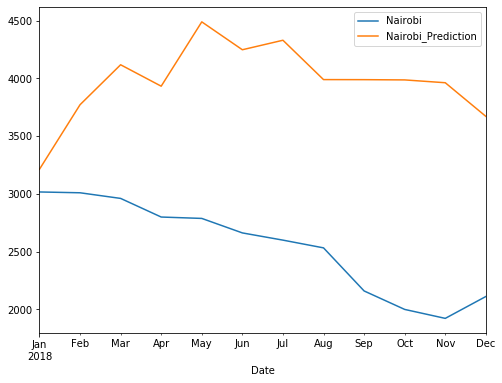

In [21]:
pd.concat([test,future_forecast],axis=1).plot()

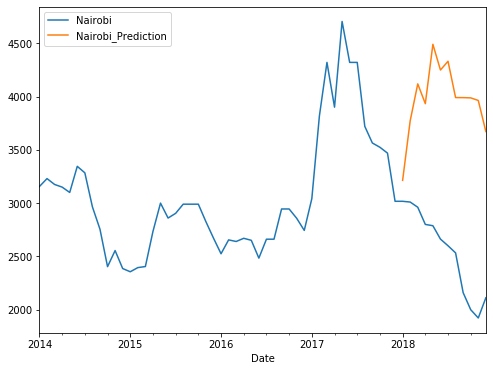

In [22]:
#Plot of entire data vs the predicted

pd.concat([df_Nairobi,future_forecast],axis=1).plot()

In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(act_vs_predict['Nairobi'],act_vs_predict['Nairobi_Prediction']))
print('Mean Squared Error:',metrics.mean_squared_error(act_vs_predict['Nairobi'], act_vs_predict['Nairobi_Prediction']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(act_vs_predict['Nairobi'],
                                                                     act_vs_predict['Nairobi_Prediction'])))

Mean Absolute Error: 1428.4632721546539
Mean Squared Error: 2305452.1021889932
Root Mean Squared Error: 1518.371529695217
